In [20]:
!pip install kaggle #install kaggle


StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 21, Finished, Available, Finished)

In [21]:
#connect to the api
import os
from kaggle.api.kaggle_api_extended import KaggleApi
os.environ['KAGGLE_USERNAME'] = 'omarrrelgoharyy'
os.environ['KAGGLE_KEY'] = '01b3eadb1f02f4350986e30cde9cca3b'

api = KaggleApi()
api.authenticate()

api.dataset_download_file('jockeroika/properties-for-rent-online', 'listings 2 reduced.csv')

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 22, Finished, Available, Finished)

Dataset URL: https://www.kaggle.com/datasets/jockeroika/properties-for-rent-online


False

In [22]:
# Load data into pandas DataFrame from "/lakehouse/default/Files/listings%202%20reduced.csv"
import pandas as pd
df = pd.read_csv("/lakehouse/default/Files/listings%202%20reduced.csv")
display(df)


StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 23, Finished, Available, Finished)

/tmp/ipykernel_6223/2957792579.py:3: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/lakehouse/default/Files/listings%202%20reduced.csv")


SynapseWidget(Synapse.DataFrame, 82002587-cc32-4c94-bb54-f7b2c52930de)

In [23]:
#normalization using pandas
df = spark.read.table("listings_table")
host_cols=['host_id','host_url','host_name','host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified']
df_hosts = df[host_cols].drop_duplicates(subset=['host_id'])

df_hosts.write.mode("overwrite").option("overwriteSchema","true").saveAsTable('hosts')

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 24, Finished, Available, Finished)

In [24]:
#normalization using pandas
df = spark.read.table("listings_table")
listing_cols=['id','listing_url','scrape_id','last_scraped','source','description','host_id','price','neighbourhood','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','latitude','longitude','neighbourhood_cleansed']
df_listings = df[listing_cols].drop_duplicates(subset=['id'])

df_listings.write.mode("overwrite").option("overwriteSchema","true").saveAsTable('listings')
print(df_listings)

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 25, Finished, Available, Finished)

DataFrame[id: bigint, listing_url: string, scrape_id: bigint, last_scraped: string, source: string, description: string, host_id: bigint, price: string, neighbourhood: string, review_scores_rating: double, review_scores_accuracy: double, review_scores_cleanliness: double, review_scores_checkin: double, review_scores_communication: double, review_scores_location: double, review_scores_value: double, latitude: double, longitude: double, neighbourhood_cleansed: string]


In [25]:
#change datatype to date and save by spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date

# df_host_spark = spark.createDataFrame(df_hosts)

df_hosts = df_hosts.withColumn(
    "host_since",
    to_date("host_since", "yyyy-MM-dd")
)


df_hosts.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("hosts")


    


StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 26, Finished, Available, Finished)

In [26]:
display(df_hosts)

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 27, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f43a3312-4841-49a4-afb7-4dfd3524097b)

In [27]:
#change the datatype from string to date
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date

df_listings = spark.read.table("listings")
# df_listings_spark = spark.createDataFrame(df_listings)
df_listings = df_listings.withColumn(
    "last_scraped",
    to_date("last_scraped", "yyyy-MM-dd")
)



df_listings.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("listings")


StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 28, Finished, Available, Finished)

In [28]:
df_listings = spark.read.table("listings")

df_listings.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("listings")
display(df_listings)

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 29, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 368b969b-48cf-49a8-9deb-b8d6d9276fa8)

In [29]:
spark.catalog.dropTempView('listings')

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 30, Finished, Available, Finished)

False

In [30]:
#transform data by removing $ to be easy to measure the avg price
from pyspark.sql.functions import regexp_replace,col

df_listings = spark.read.table("listings")
df_listings = spark.table("listings") \
    .withColumn("price_cleaned", regexp_replace("price", "[$,]", "").cast("float"))

df_listings.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("listings")

display(df_listings)

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 31, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bf707444-d54c-4c68-bcfb-ca3fdfd9dc9b)

In [31]:
#create cleaned table (transform the data)
from pyspark.sql import SparkSession



##sqark = SparkSession.builder.getOrCreate()
#df_listings_spark=spark.createDataFrame(df_listings)
#df_listings_spark.createOrReplaceTempView("listings")


result = spark.sql("""
CREATE OR REPLACE TABLE cleaned_listings AS
SELECT
    id,
    listing_url,
    scrape_id,
last_scraped,
source,

description,
host_id,
price,
neighbourhood,
review_scores_rating,
review_scores_accuracy,
review_scores_cleanliness,
review_scores_checkin,
review_scores_communication,
review_scores_location,
review_scores_value,
latitude,
longitude,
price_cleaned,
neighbourhood_cleansed
FROM listings;

 """)


   
result.show()

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 32, Submitted, Running, Running)

In [39]:
%%sql

SELECT * FROM cleaned_listings
order by id asc

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 40, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 20 fields>

In [40]:
#calculate avg price with spark sql
result=spark.sql("""
select avg(price_cleaned) from cleaned_listings --first task
""")

result.show()

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 41, Finished, Available, Finished)

+------------------+
|avg(price_cleaned)|
+------------------+
|181.34981693311806|
+------------------+



In [41]:
result = spark.sql(""" --second task
select distinct neighbourhood,count(id) as numbers_in_neighbourhood from cleaned_listings
group by neighbourhood
order by numbers_in_neighbourhood desc
""" )
result.show()

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 42, Finished, Available, Finished)

+--------------------+------------------------+
|       neighbourhood|numbers_in_neighbourhood|
+--------------------+------------------------+
|                NULL|                   40755|
|Greater London, E...|                   33337|
|London, United Ki...|                    5448|
|London, England, ...|                    4833|
|London, Greater L...|                     663|
|Greater London, U...|                     208|
|Wembley Park, Eng...|                     119|
|London , England,...|                     113|
|England, United K...|                      74|
|Twickenham, Unite...|                      38|
|London, UK, Unite...|                      32|
|Richmond, England...|                      31|
|Kingston upon Tha...|                      29|
|Harlington, Engla...|                      29|
|Greater London, E...|                      27|
|Richmond, United ...|                      26|
|Croydon, England,...|                      26|
|Woodford, England...|                  

In [42]:
result = spark.sql("""
select id,review_scores_rating as highest_score from cleaned_listings
order by highest_score desc
"""
)
result.show()

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 43, Finished, Available, Finished)

+------------------+-------------+
|                id|highest_score|
+------------------+-------------+
|734469491592906852|          5.0|
|          38080622|          5.0|
|          14101539|          5.0|
|          31328470|          5.0|
|          12386580|          5.0|
|649703935201274771|          5.0|
|           7528037|          5.0|
|          53394254|          5.0|
|          31634072|          5.0|
|797829926677166969|          5.0|
|          18246501|          5.0|
|          37455197|          5.0|
|           6464196|          5.0|
|          38604227|          5.0|
|          39776605|          5.0|
|549802817022246647|          5.0|
|          31196354|          5.0|
|           9214679|          5.0|
|          33310272|          5.0|
|941153990598182582|          5.0|
+------------------+-------------+
only showing top 20 rows



In [43]:

result=spark.sql(
    """
    select hosts.host_name,max(cleaned_listings.price_cleaned) as highest_price from hosts inner join cleaned_listings 
    on hosts.host_id=cleaned_listings.host_id
    group by hosts.host_name
    order by highest_price DESC
    """
)

result.show()

StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 44, Finished, Available, Finished)

+---------------+-------------+
|      host_name|highest_price|
+---------------+-------------+
|          Rajia|      80100.0|
|         Yvonne|      53588.0|
|         Daniel|      36000.0|
|          Osnat|      25000.0|
|             Mo|      25000.0|
|          David|      20362.0|
|Smart Solutions|      20000.0|
|           Eloi|      12000.0|
|UnderTheDoormat|      10028.0|
|     Travelnest|      10000.0|
|        Patrick|      10000.0|
|       Alkhalil|      10000.0|
|       Karolina|      10000.0|
|        Azimali|       9999.0|
|       Jermaine|       9999.0|
|         Ruslan|       9999.0|
|        Dainius|       9999.0|
|          Andre|       9999.0|
|      Alexandra|       9857.0|
|          Veeve|       9547.0|
+---------------+-------------+
only showing top 20 rows



StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 45, Finished, Available, Finished)

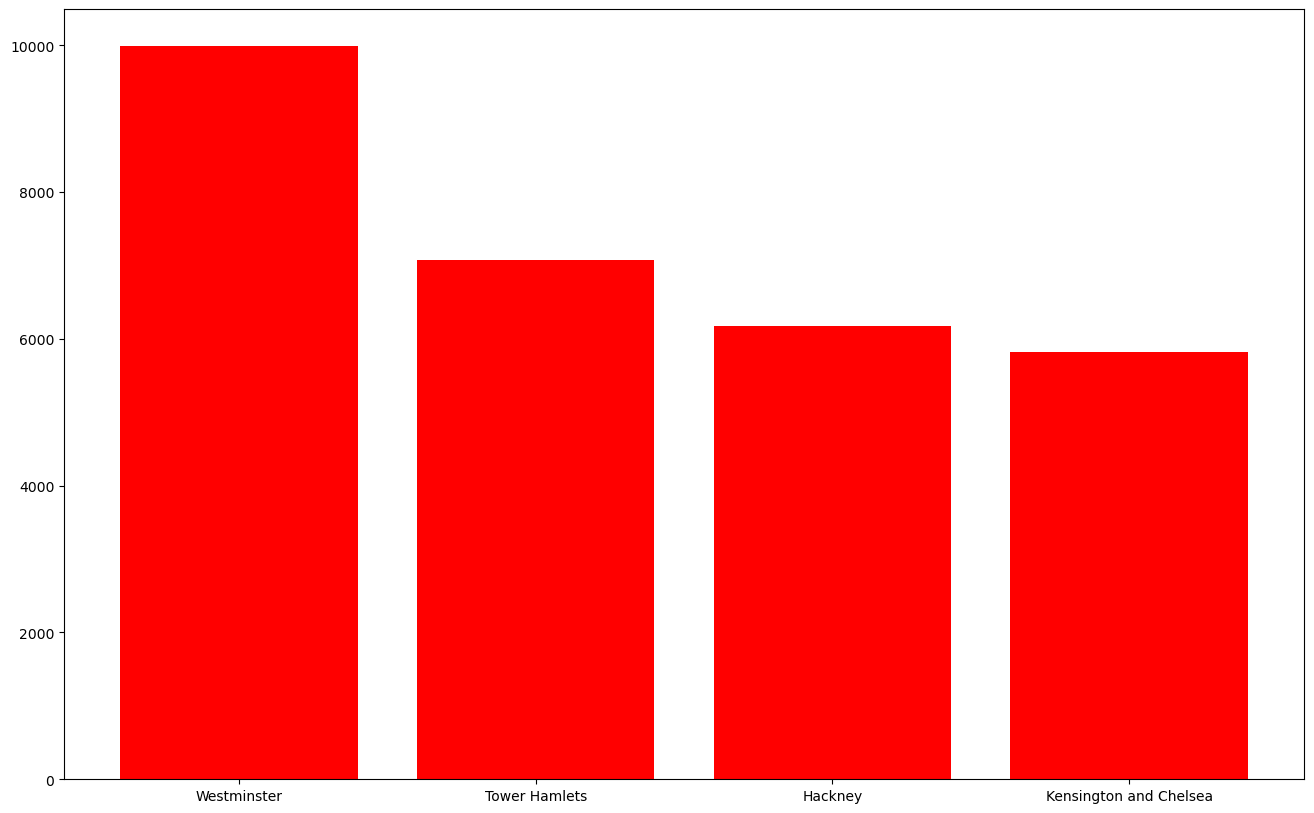

In [44]:
#visualize the top 4
top4_neighborhoods = spark.sql("""
    SELECT neighbourhood_cleansed, COUNT(id) AS id_count
    FROM cleaned_listings
    GROUP BY neighbourhood_cleansed
    ORDER BY id_count DESC
    LIMIT 4
""")

top4_pd = top4_neighborhoods.toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.bar(top4_pd["neighbourhood_cleansed"],top4_pd["id_count"],color="red")
plt.xlabel=("neighbourhood_cleansed")
plt.ylabel=("id")
plt.show()

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get data from Spark
map_graph = spark.sql("""
    SELECT id, latitude, longitude 
    FROM cleaned_listings
    WHERE latitude IS NOT NULL AND longitude IS NOT NULL
""")

map_graph_pd = map_graph.toPandas()

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=map_graph_pd,
    x="longitude",
    y="latitude",
    hue=None,  # You can set hue="id" or another column if needed
    s=10
)

plt.title("Listings Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 46, Finished, Available, Finished)

TypeError: 'str' object is not callable

In [46]:
#full code
 
#load data into lakehouse
import pandas as pd
df = pd.read_csv("/lakehouse/default/Files/listings%202%20reduced.csv")


#normalizaation table with pandas
host_cols=['host_id','host_url','host_name','host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified']
df_hosts = df[host_cols].drop_duplicates(subset=['host_id'])
df_hosts.to_parquet("/lakehouse/default/Tables/host", engine="pyarrow", index=False)


listing_cols=['id','listing_url','scrape_id','last_scraped','source','description','host_id','price','neighbourhood','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','latitude','longitude']
df_listings = df[listing_cols].drop_duplicates(subset=['id'])

df_listings.to_parquet("/lakehouse/default/Tables/Listings", engine="pyarrow", index=False)


#transform by changing column data type from string to date
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date
spark = SparkSession.builder.getOrCreate()
df_listings_spark = spark.createDataFrame(df_listings)
df_listings_spark = df_listings_spark.withColumn(
    "last_scraped",
    to_date("last_scraped", "yyyy-MM-dd")
)
df_listings_spark.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("listings")

#change column from string to int
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
df_listings_spark=df_listings_spark.withColumn("price",col("price").cast("int"))
df_listings_spark.write \
   .format("delta") \
   .mode("overwrite") \
   .option("overwriteSchema","true") \
  .saveAsTable("listings")

#transform into cleaned table by removing the char from the column
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace,col

sqark = SparkSession.builder.getOrCreate()
df_listings_spark=spark.createDataFrame(df_listings)
df_listings_spark.createOrReplaceTempView("listings")

result = spark.sql("""
CREATE TABLE cleaned_listings AS
SELECT
    id,
    listing_url,
    scrape_id,
last_scraped,
source,

 CAST(regexp_replace(price, '[$,]', '') AS DOUBLE) AS price_cleaned,
description,
host_id,
price,
neighbourhood,
review_scores_rating,
review_scores_accuracy,
review_scores_cleanliness,
review_scores_checkin,
review_scores_communication,
review_scores_location,
review_scores_value,
latitude,
longitude
FROM listings;

 """)
#save the cleaned table 
df_listings_spark.write \
   .format("delta") \
   .mode("overwrite") \
   .option("overwriteSchema","true") \
   .saveAsTable("cleaned_listings")

result=spark.sql(
    """
    select host_since from hosts

    """
)
result.show()



StatementMeta(, 5e8a4f80-4f09-4437-bf69-a3180a563a0b, 47, Finished, Available, Finished)

/tmp/ipykernel_6223/531314965.py:5: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/lakehouse/default/Files/listings%202%20reduced.csv")


+----------+
|host_since|
+----------+
|2012-10-25|
|2014-04-28|
|2016-09-12|
|2019-08-10|
|2020-10-30|
|2015-12-31|
|2014-03-23|
|2016-02-27|
|2018-12-28|
|2022-06-14|
|2010-01-01|
|2013-10-20|
|2019-05-21|
|2013-01-23|
|2022-05-06|
|2022-05-16|
|2022-09-02|
|2013-01-23|
|2016-06-23|
|2022-05-05|
+----------+
only showing top 20 rows

